In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#Removing Depreciation warning
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [4]:
# Importing the dataset
dataset = pd.read_csv(r"C:\Users\Saurabh\Videos\dataset\movie_review.csv")

In [5]:
dataset.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [7]:
dataset.columns

Index(['fold_id', 'cv_tag', 'html_id', 'sent_id', 'text', 'tag'], dtype='object')

In [8]:
#Cleaning the dataset
dataset.drop(['fold_id','cv_tag','html_id','sent_id'],axis=1,inplace=True)

In [9]:
dataset.head()

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos


In [10]:
#Checking for the null values
print(dataset.isna().sum())

text    0
tag     0
dtype: int64


In [15]:
#Tokenization using Regular expression
tokenizer = RegexpTokenizer("[a-zA-Z]+")
print(dataset['text'][1])

for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen .


In [16]:
#Making a set of stopwords in English
sw = set(stopwords.words('English'))

In [17]:
#Making object of Porterstemmer for stemming
ps = PorterStemmer()
corpus= []

In [18]:
for i in range(0,len(dataset['text'])):
	review = dataset['text'][i].lower()
	review = tokenizer.tokenize(dataset['text'][i])

	#Removing the stopwords and stemming using Porter Stemmer
	review = [ps.stem(word) for word in review if word not in sw]
	review = ' '.join(review)
	corpus.append(review)

In [19]:
#Vectorization
cv = CountVectorizer(max_features=15000)
X = cv.fit_transform(corpus).toarray()

Y = dataset.iloc[:,1].values

In [20]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
X.shape

(64720, 15000)

In [50]:
y = list(Y)
pos_count = y.count('pos')
neg_count =y.count('neg')

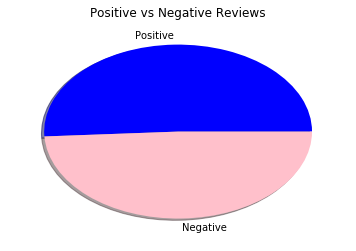

In [62]:
# Making pie chart
import matplotlib.pyplot as plt
colors = ["blue","pink"]
sizes = [pos_count,neg_count]
labels = 'Positive','Negative'

plt.pie(x=sizes,shadow=True,colors=colors,labels=labels)
plt.title("Positive vs Negative Reviews")
plt.show()

In [39]:
#Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


In [23]:
#Fitting Logistic regression model into training set
from sklearn.linear_model import LogisticRegression
logisticR = LogisticRegression()

In [24]:
logisticR.fit(X_train,Y_train)

#Predicting the Test set results
y_pred = logisticR.predict(X_test)

In [25]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test,y_pred)
print(cm)

[[4458 2032]
 [2036 4418]]


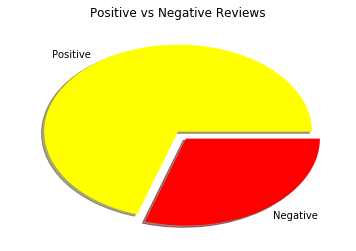

In [70]:
#Making pie chart after prediction using logistic regression
poslog_count = cm[0][0] + cm[1][1]
neglog_count = cm[0][1] + cm[1][0]
colors = ["yellow","red"]
sizes = [poslog_count,neglog_count]
labels = 'Positive','Negative'
explode = (0,0.1)

plt.pie(x=sizes,shadow=True,explode=explode,colors=colors,labels=labels)
plt.title("Positive vs Negative Reviews")
plt.show()

In [29]:
#Accuracy using Logistic regression
acc = accuracy_score(Y_test,y_pred)
print(acc)

0.6857231149567367


In [30]:
#Fitting the Naive  Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
#Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [71]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(Y_test,Y_pred)
print(cm1)

[[4496 1994]
 [1882 4572]]


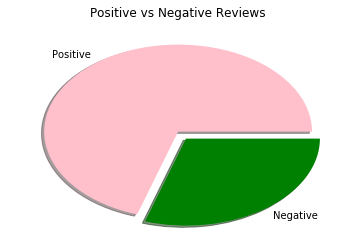

In [72]:
#Making pie chart after prediction using Naive Bayes
poslo_count = cm1[0][0] + cm1[1][1]
neglo_count = cm1[0][1] + cm1[1][0]
colors = ["pink","green"]
sizes = [poslo_count,neglo_count]
labels = 'Positive','Negative'
explode = (0,0.1)

plt.pie(x=sizes,shadow=True,explode=explode,colors=colors,labels=labels)
plt.title("Positive vs Negative Reviews")
plt.show()

In [33]:
# Accuracy using Multinomial Naive Bayes
acc = accuracy_score(Y_test,Y_pred)
print(acc)


0.7005562422744128
